In [1]:
# imports
import json
import numpy as np
from logging import raiseExceptions
from matplotlib.colors import Normalize, LogNorm
import numpy as np
from utility import (
    createFolder, 
    save_object, 
    produce_name_datetime,
)
from generate_data import (
    generate_data_parallel,
    generate_data_parallel_single_explore
)
import gen_two_param_vary as gtpv
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import plot_two_param_vary as ptpv

In [8]:
# Read the parameters from the json file
with open('constants/base_params_2D.json') as f:
    base_params = json.load(f)
with open('constants/variable_parameters_dict_2D.json') as g:
    variable_parameters_dict = (json.load(g))

In [9]:
# gen data
variable_parameters_dict = gtpv.generate_vals_variable_parameters_and_norms(
        variable_parameters_dict
    )
print_simu = False
params_list = gtpv.produce_param_list_n_double(base_params, variable_parameters_dict)
Data_list = generate_data_parallel_single_explore(params_list, print_simu)

dev_price_list = [d["dev_price"] for d in Data_list]
excess_var_list = [d["excess_var"] for d in Data_list]
excess_autocorr_list = [d["excess_autocorr"] for d in Data_list]
kurtosis_list = [d["kurtosis"] for d in Data_list]
dev_price_mean = gtpv.unpack_and_mean(dev_price_list, variable_parameters_dict,base_params, 2)
excess_var_mean = gtpv.unpack_and_mean(excess_var_list, variable_parameters_dict, base_params, 2)
excess_autocorr_mean = gtpv.unpack_and_mean(excess_autocorr_list, variable_parameters_dict, base_params, 2)
kurtosis_mean = gtpv.unpack_and_mean(kurtosis_list, variable_parameters_dict, base_params, 2)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    4.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    5.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    6.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    7.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    8.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    9.1s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:   10.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   11.5s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:   12.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   14.4s
[Parallel(

/var/folders/hb/bc0srnt52zx6lbw4t2k_t_k80000gn/T/ipykernel_74629/1971898336.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  a = ptpv.double_phase_diagram("file", dev_price_mean, r"dev_price", "dev_price",variable_parameters_dict, get_cmap("Reds"), levels = levels)
/var/folders/hb/bc0srnt52zx6lbw4t2k_t_k80000gn/T/ipykernel_74629/1971898336.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  b = ptpv.double_phase_diagram("file", excess_var_mean, r"excess_var", "excess_var",variable_parameters_dict, get_cmap("Blues"), levels = levels)
/var/folders/hb/bc0srnt52zx6lbw4t2k_t_k80000gn/T/ipykernel_74629/1971898336.py:6: MatplotlibDeprecationWarning: 

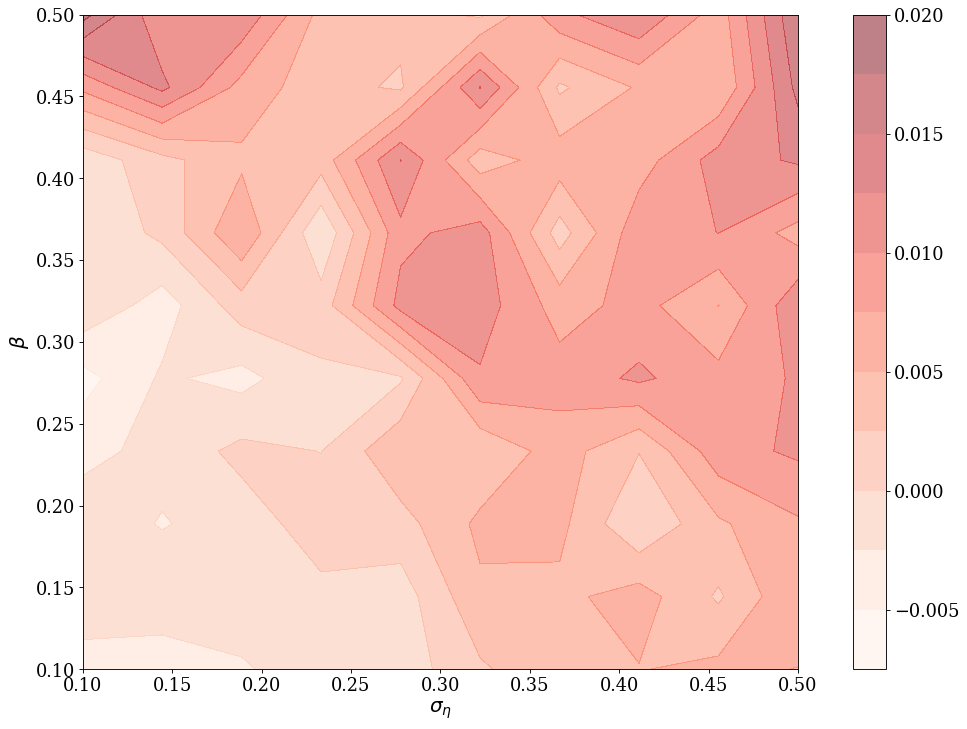

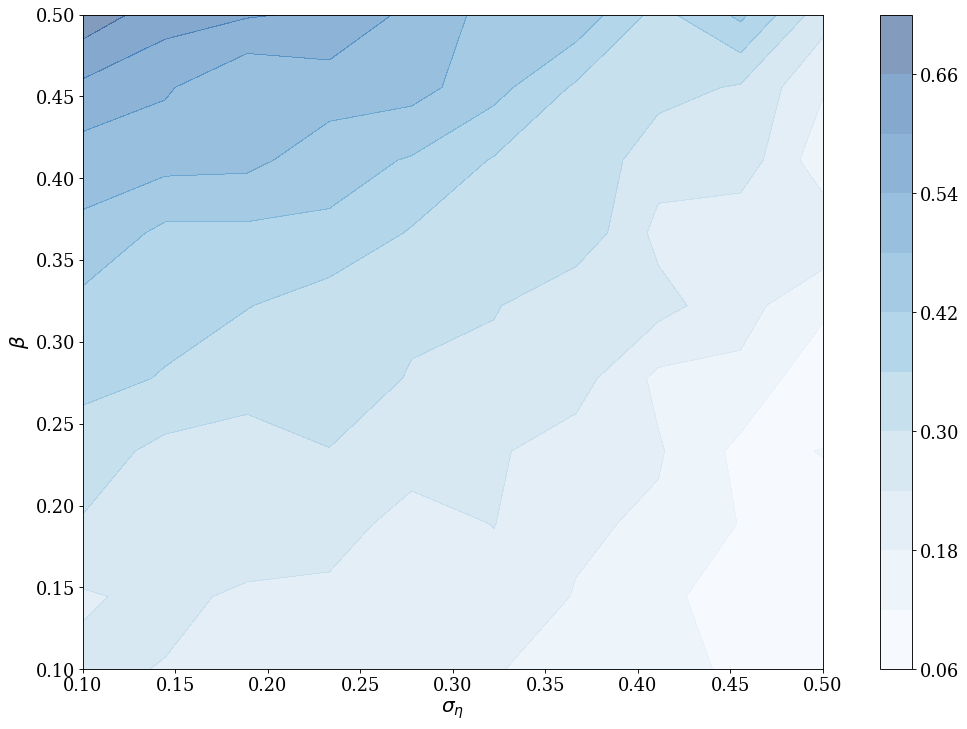

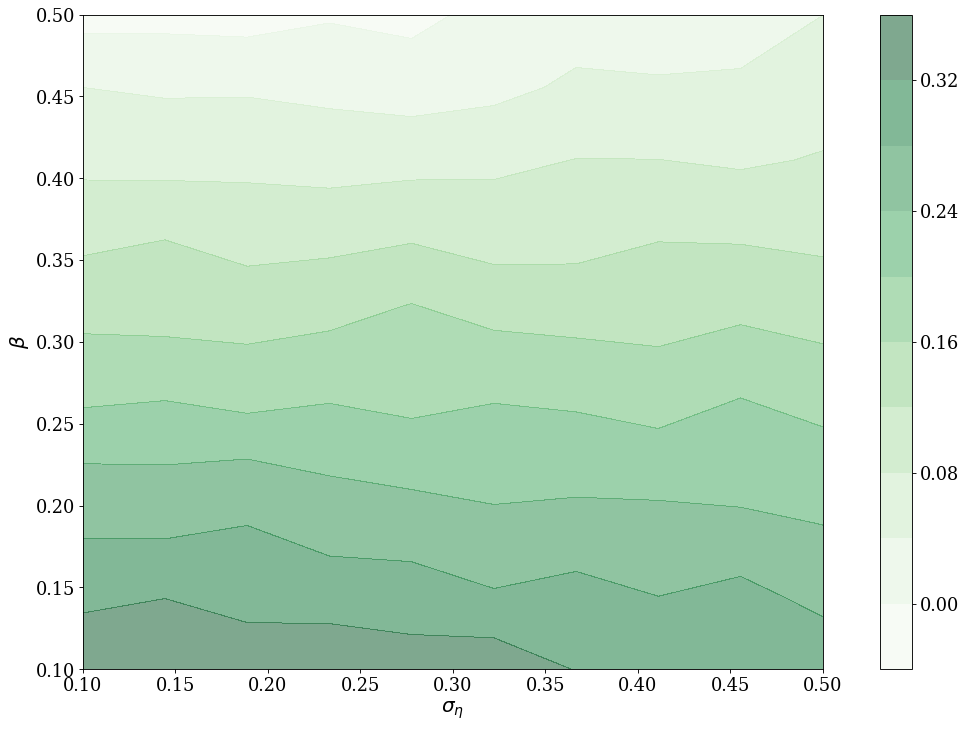

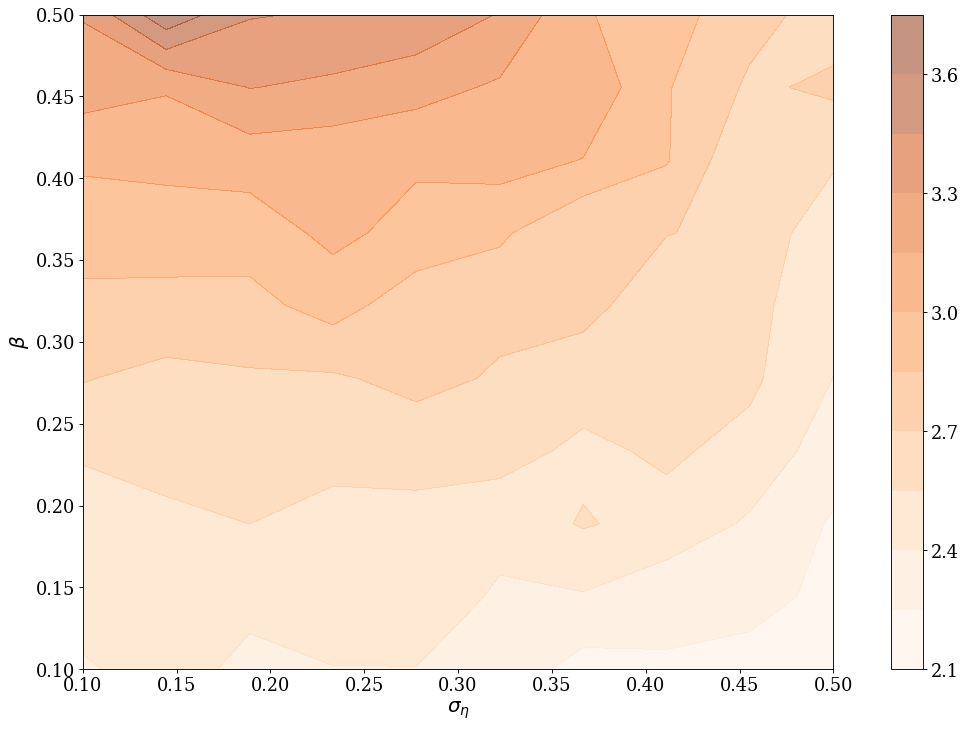

In [11]:
#Plot 
levels = 10

a = ptpv.double_phase_diagram("file", dev_price_mean, r"dev_price", "dev_price",variable_parameters_dict, get_cmap("Reds"), levels = levels)  
b = ptpv.double_phase_diagram("file", excess_var_mean, r"excess_var", "excess_var",variable_parameters_dict, get_cmap("Blues"), levels = levels)
c = ptpv.double_phase_diagram("file", excess_autocorr_mean, r"excess_autocorr", "excess_autocorr",variable_parameters_dict, get_cmap("Greens"), levels = levels)
d = ptpv.double_phase_diagram("file", kurtosis_mean, r"kurtosis", "kurtosis",variable_parameters_dict, get_cmap("Oranges"), levels = levels)